In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

import ThetaoSectors as TS


In [3]:
exp_name='lcic'
version = 'v20230713'

start_dir='/perm/nk0j/ecearth3-cmip6/runtime/classic'
run_dir = f'/ec/res4/scratch/nk0j/ecearth3-cmip6/{exp_name}'
cmor_dir = f'/scratch/nk0j/cmorised-results/{exp_name}/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/thetao/gn/{version}'
#run_dir = f'/ec/res4/scratch/nlcd/r9469-cmip6-bisi-knmi/{exp_name}'
#run_dir = f'/ec/res4/scratch/nlcd/r9469-cmip6-bisi-knmi/{exp_name}/'

In [4]:
leg_number='084'
year='2098'

In [5]:
########################## File definition #########################
## Paths
path_input = f'{start_dir}/fwf/interactive/input/'
path_output = f'{start_dir}/fwf/interactive/forcing_files/{exp_name}/'

## Input data
## Output file from nemo: input file for freshwater forcing
files_thetao = f'{cmor_dir}/*' #other output format
file_area = f'{path_input}/areacello_Ofx_EC-Earth3_historical_r1i1p1f1_gn.nc'



In [6]:
## Open thetao dataset + rename dimensions (to be consistent with areacello file)
ds = xr.open_mfdataset(files_thetao)
ds


<xarray.Dataset>
Dimensions:             (time: 1980, bnds: 2, lev: 75, j: 292, i: 362,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12...
  * lev                 (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j                   (j) int32 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292
  * i                   (i) int32 1 2 3 4 5 6 7 ... 356 357 358 359 360 361 362
    latitude            (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    lev_bnds            (time, lev, bnds) float64 dask.array<chunksize=(12, 75, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(12, 292, 362, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(12, 292, 362, 4), meta=np.ndarray>
    thetao              (time, lev, j, i) float32 dask.array<chunksize=(12, 75, 292, 362), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    title:                              EC-Earth3 output prepared for CMIP6
    tracking_id:                        hdl:21.14100/497acc80-7b6e-44b8-a8c5-...
    variable_id:                        thetao
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.7.1

In [7]:
# Calculating Annual Averages from Time Series of Monthly Means
# Obtain month length for data record
month_length = ds.time.dt.days_in_month

# Calculate the weights by grouping by 'time.year'.
weights = (
    month_length.groupby("time.year") / month_length.groupby("time.year").sum()
)

# Calculate the weighted average
ds_year = (ds['thetao'] * weights).groupby("time.year").sum(dim="time")


In [8]:
ds_year

<xarray.DataArray (year: 165, lev: 75, j: 292, i: 362)>
dask.array<transpose, shape=(165, 75, 292, 362), dtype=float64, chunksize=(1, 75, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    longitude  (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014

In [9]:

# Read lev bnds
ds_lev_bnds = ds['lev_bnds'].mean('time')
ds_lev_bnds


<xarray.DataArray 'lev_bnds' (lev: 75, bnds: 2)>
dask.array<mean_agg-aggregate, shape=(75, 2), dtype=float64, chunksize=(75, 2), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
Dimensions without coordinates: bnds

In [10]:
## Open areacello dataset
ds_area = xr.open_dataset(file_area)




In [11]:
ds_year

<xarray.DataArray (year: 165, lev: 75, j: 292, i: 362)>
dask.array<transpose, shape=(165, 75, 292, 362), dtype=float64, chunksize=(1, 75, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    longitude  (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014

In [12]:

def nearest_above(my_array, target):
    '''
    Find nearest value in array that is greater than target value and return corresponding index
    
    Args:
        my_array: dataarray with (depth) values
        target: target depth

    Returns:
        index of nearest value in array that is greater than target value 
    '''
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    # We need to mask the negative differences and zero
    # since we are looking for values above
    if np.all(mask):
        return None # returns None if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    # Returns the index of the minimum value
    return masked_diff.argmin() 

def nearest_below(my_array, target):
    '''
    Find nearest value in array that is smaller than target value and return corresponding index
    
    Args:
        my_array: dataarray with (depth) values
        target: target depth

    Returns:
        index of nearest value in array that is smaller than target value 
    '''

    diff = target - my_array
    mask = np.ma.less_equal(diff, 0)
    # We need to mask the positive differences and zero
    # since we are looking for values below
    if np.all(mask):
        return None # returns None if target is smaller than any value
    masked_diff = np.ma.masked_array(diff, mask)
    # Returns the index of the minimum value
    return masked_diff.argmin()

def lev_weighted_mean(ds_var,ds_lev_bnds,depth_bottom, depth_top):
    '''
    Compute volume weighted mean oceanic temperature over specific depth 
    layers (centered around ice shelf depth)
    
    Args:
        ds_var: dataarray with variable (optional: area-weighted mean)
        ds_lev_bnds: dataarray with lev_bnds
        depth_bottom: bottom_depth
        depth_top: top_depth
    
    Returns: 
       Depth weighted mean oceanic temperature 
       If input is area-weighted, output is volume-weighted

    '''   
    # Find oceanic layers covering the depth bounds and take a slice of these
    # layers
    lev_ind_bottom= nearest_above(ds_lev_bnds[:,1],depth_bottom)
    lev_ind_top = nearest_below(ds_lev_bnds[:,0],depth_top)
    levs_slice = ds_var.isel(lev=slice(lev_ind_top,lev_ind_bottom+1))
    
    # Create weights for each oceanic layer, correcting for layers that fall only partly within specified depth range 
    lev_bnds_sel = ds_lev_bnds.values[lev_ind_top:lev_ind_bottom+1]
    lev_bnds_sel[lev_bnds_sel > depth_bottom] = depth_bottom
    lev_bnds_sel[lev_bnds_sel < depth_top] = depth_top
    # Weight equals thickness of each layer
    levs_weights = lev_bnds_sel[:,1]-lev_bnds_sel[:,0] 
    # DataArray required to apply .weighted on DataArray
    levs_weights_DA = xr.DataArray(levs_weights,coords={'lev': levs_slice.lev},
             dims=['lev'])
    
    # Compute depth weighted mean of ocean slice
    levs_slice_weighted = levs_slice.weighted(levs_weights_DA)
    levs_weighted_mean = levs_slice_weighted.mean(("lev"))
    
    # Return layer-weighted ocean temperature
    return levs_weighted_mean

In [13]:
# Compute layer weighted mean
ds_layer_weighted_mean = lev_weighted_mean(ds_year,ds_lev_bnds, 700, 400)


In [14]:
ds_layer_weighted_mean

<xarray.DataArray (year: 165, j: 292, i: 362)>
dask.array<truediv, shape=(165, 292, 362), dtype=float64, chunksize=(1, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    longitude  (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014

In [17]:
# Compute mean over period
#ds_layer_hist = ds_layer_weighted_mean.sel(year=slice(1985,2014)).mean('year')
ds_layer_hist = ds_layer_weighted_mean.sel(year=slice(1985)).mean('year')


In [18]:
ds_layer_hist.plot.pcolormesh()

: 

: 

In [ ]:
longitude=ds['longitude']
latitude=ds['latitude']
thetao=ds_layer_hist
thetao


<xarray.DataArray (j: 292, i: 362)>
dask.array<mean_agg-aggregate, shape=(292, 362), dtype=float64, chunksize=(292, 362), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    longitude  (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>

In [ ]:
x=longitude.data
y=latitude.data
thetao=thetao.data

In [ ]:
x

dask.array<where, shape=(292, 362), dtype=float64, chunksize=(292, 362), chunktype=numpy.ndarray>

/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


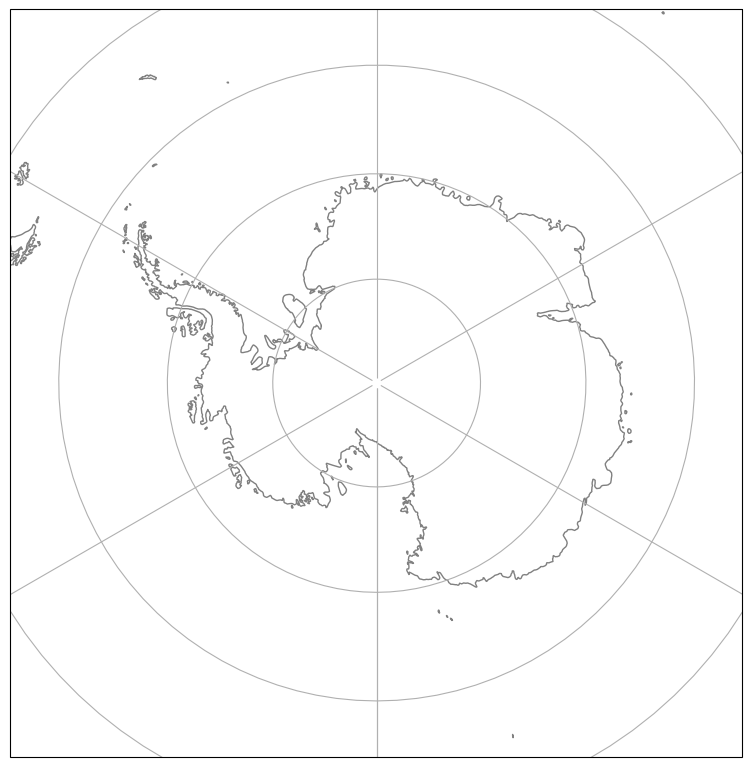

In [ ]:
# Plot Antarctic ocean temperature
f = plt.figure(figsize=(12,9), constrained_layout=True)
ax = f.add_axes([.38,0,.61,1], projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree()) # x0, x1, y0, y1 in degrees
ax.gridlines()
ax.coastlines(color='grey')

im = ax.pcolormesh(x, y, thetao, vmin=-2, vmax=4, shading='auto', transform=ccrs.PlateCarree())


In [ ]:

cbar = f.colorbar(im, location='bottom', shrink = 1, pad=0.05, ax=ax)
cbar.set_label('thetao')
#plt.colorbar(im)

plt.show()